### EDA with Movies

In this analysis we are interested in conducting exploratory data analysis of movies released from 1980 to 2020. 

Questions to guide our analysis:

1. Which movie studios saw the most success at the box office between 1980 and 2020? Success will be defined as the total revenue for all the movies
4. What genres of movies generate the most revenue? 
2. Can we find the most/least successful movies made between 1980 and 2020? 
3. A lot of resources are invested into making a movie. From our list of variables, which are correlated with revenue at the box office? 


In [1]:
# we will be adjusting several figures for inflation, installing cpi library for easier calculations
#pip install cpi
#cpi.update()


In [2]:
#import packages
import cpi as cpi
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
#read data

data = pd.read_csv('/movies.csv')

#look at data
data.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#how much of our data is missing. For now we will be removing NA data
data.isna().sum()

#Drop NA values
data = data.dropna()
data.isna().sum()
#no more NA values

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [5]:
#data types
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#we have some float values that don't need to be float, change to ints 
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')

In [7]:
#format of released is MONTH DAY, YEAR (COUNTRY). We are only interested in the year
#data['yearreleased'] = data['released'].str.extract(pat = '([0-9]{4})').astype(int)
#data.head()

In [8]:
#we are interested in using inflation adjusted figures for gross (revenue), budget to make some calculations. We use 2020 CPI figures
data['grossadjusted'] = data.apply(
    lambda data: cpi.inflate(data.gross, data.year, to=2020), axis=1
)

data['budgetadjusted'] = data.apply(
    lambda data: cpi.inflate(data.budget, data.year, to=2020), axis=1
)

data.sort_values(by = ['grossadjusted'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,grossadjusted,budgetadjusted
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,3.550221e+09,3.225059e+08
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,3.434832e+09,2.859097e+08
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2.832014e+09,3.603919e+08
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2.259817e+09,2.675280e+08
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.8,381000.0,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,10500000,792910554,Universal Pictures,115.0,2.126570e+09,2.816078e+07


In [9]:
#data.dtypes

#df.apply(
 #   lambda data: cpi.inflate(data.gross, data.year), axis=1
#)

In [10]:
#find range of year

min(data['year'])
max((data['year']))

2020

In [11]:
#sorted data by 
data.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,grossadjusted,budgetadjusted
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,3.434832e+09,2.859097e+08
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2.832014e+09,3.603919e+08
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,3.550221e+09,3.225059e+08
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2.259817e+09,2.675280e+08
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2.111204e+09,3.308483e+08


In [12]:
#pd.set_option('display.max_rows', None)

#data

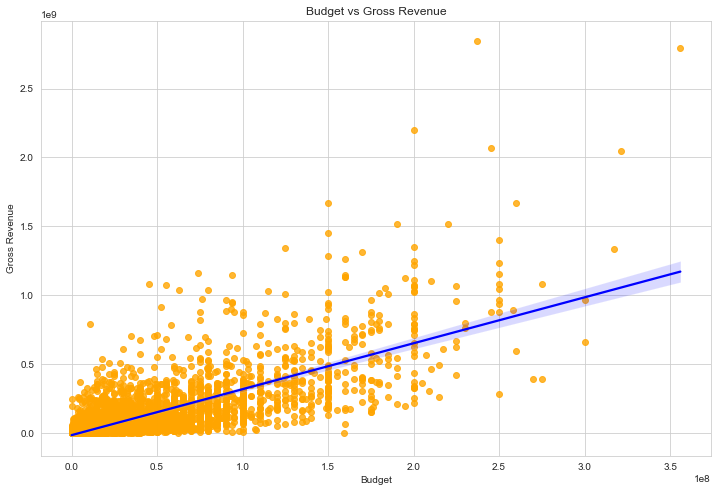

In [13]:
#plot budget vs gross revenue using seaborn
sns.set_style("whitegrid")
sns.regplot(x = data['budget'], y = data['gross'], scatter_kws = {"color": "orange"}, line_kws = {"color": "blue"})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot:title={'center':'Revenue in US Dollars by Production Company'}, xlabel='company', ylabel='gross'>

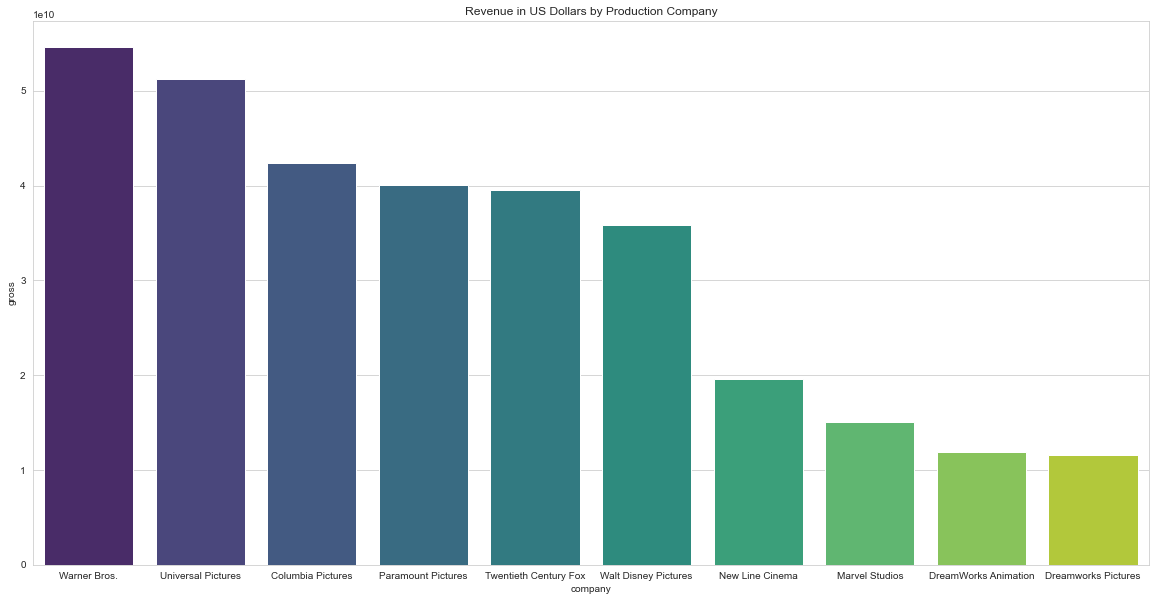

In [14]:
#we will continue with our EDA analysis

#find the top gross revenue companies

rev_company = data.groupby('company')['gross'].sum()
rev_company = rev_company.to_frame()
rev_company
#need to reset index otherwise barplot will not work
rev_company = rev_company.reset_index().sort_values("gross", ascending=False)
#rev_company.Series.sort_values('gross', ascending = False)
plt.figure(figsize=(20,10))
plt.title('Revenue in US Dollars by Production Company')
sns.barplot(x = 'company' ,y = 'gross', data = rev_company[:10], palette = 'viridis')

#usual suspects are the top 5: WB, Universal, Columbia, Paramount, and 20th Century

We find the gross revenue grouped by company and it should be no surprise who the top studios are in terms of revenue. WB, Universal, Columbia, Paramount, and 20th Century all round out the top 5 with Disney just missing the mark in 6ht place. Recent acquisitions such as Disney buying 20th Century Fox are not accounted for nor is the box office juggernaut of Marvel Studios. Note these figures are not adjusted for inflation. 

<AxesSubplot:title={'center':'Revenue in US Dollars by Genre'}, xlabel='genre', ylabel='gross'>

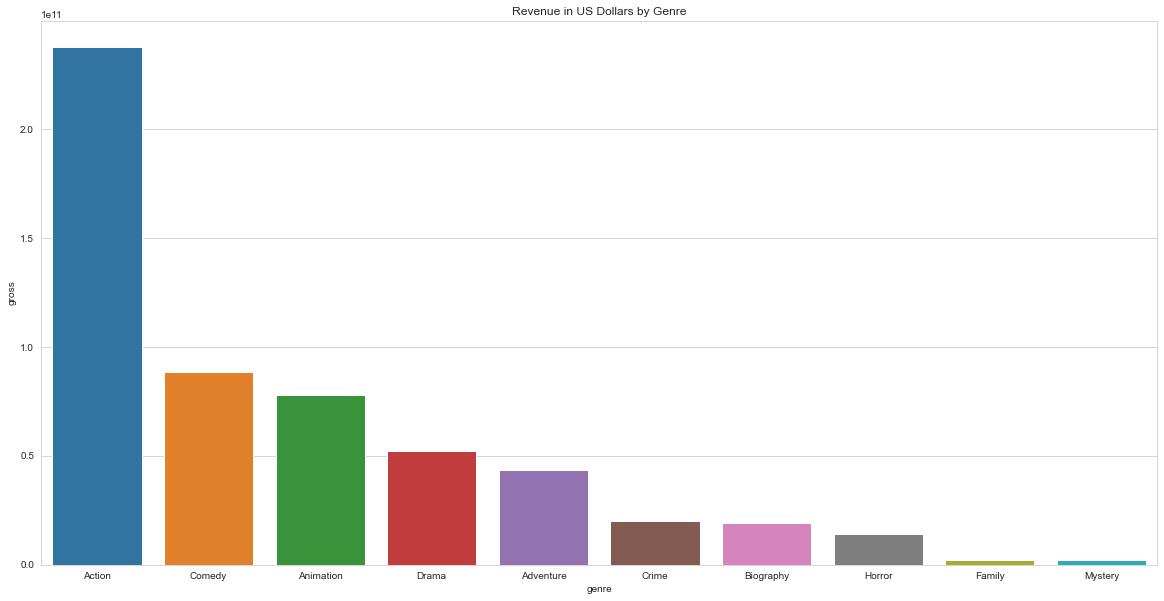

In [15]:
#we will continue with our EDA analysis

#find the top gross revenue category

rev_genre = data.groupby('genre')['gross'].sum()
rev_genre = rev_genre.to_frame()

#need to reset index otherwise barplot will not work
rev_genre = rev_genre.reset_index().sort_values("gross", ascending=False)
#rev_company.Series.sort_values('gross', ascending = False)
plt.figure(figsize=(20,10))
plt.title('Revenue in US Dollars by Genre')
sns.barplot(x = 'genre' ,y = 'gross', data = rev_genre[:10])

#usual suspects are the top 5: WB, Universal, Columbia, Paramount, and 20th Century

#would like to change the color pallete of the bars themselves for aesthetic reasons

In [16]:
rev_genre = rev_genre.reset_index().sort_values("gross", ascending=False)
rev_genre

,index,genre,gross
0,0,Action,237752868767
1,4,Comedy,88514817620
2,2,Animation,77865909110
3,6,Drama,52098564769
4,1,Adventure,43578711908
5,5,Crime,20017662162
6,3,Biography,19093930296
7,9,Horror,14261055032
8,7,Family,2074332587
9,10,Mystery,2004091467


Action is by and large the highest grossing category, followed by comedy, animation, drama, and adventure in the top 5. Action had almost 238 billion dollars earned as a category

Text(0.5, 1.0, 'Pie Chart of Revenue by Genre')

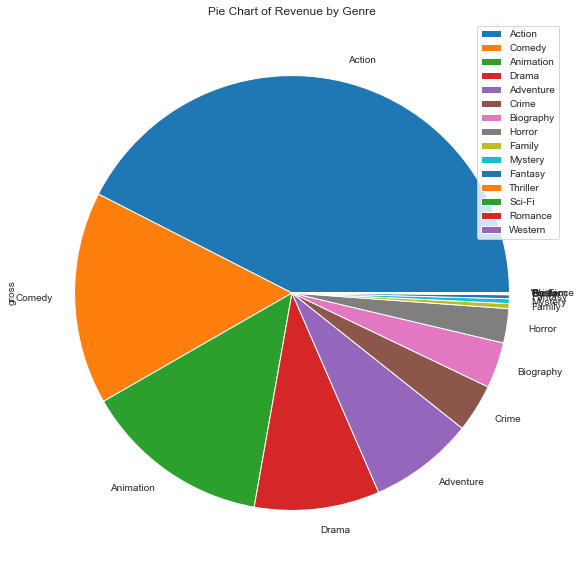

In [17]:
labels = rev_genre['genre']

pie_plot = rev_genre.plot.pie(y='gross', labels = labels, figsize=(15,10))
plt.title('Pie Chart of Revenue by Genre')

#improve by calculating percentage and plotting graph again

We are interested in finding the most successful movies in terms of box office revenue. We will use the efficiency ratio to determine this. 

The efficiency ratio (or cost revenue ration) is defined as the cost divided by the revenue. Any value below 1 the movie will be considered efficient and any value above 1 will be considered inefficient. To find this metric we will be using cpi inflation adjusted figures. 


In [18]:
data['efficiency'] = data['budgetadjusted']/data['grossadjusted']
data.sort_values(by = ['efficiency'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,grossadjusted,budgetadjusted,efficiency
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0,498.271645,2.418794e+07,48543.689320
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,3838.578943,7.514837e+06,1957.713391
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,5319.506367,8.955398e+06,1683.501684
1898,The Lovers on the Bridge,R,Drama,1991,"July 2, 1999 (United States)",7.6,13000.0,Leos Carax,Leos Carax,Juliette Binoche,France,28000000,29679,Films A2,125.0,56396.855132,5.320637e+07,943.428013
3413,Savior,R,Drama,1998,"November 20, 1998 (United States)",7.3,11000.0,Predrag Antonijevic,Robert Orr,Dennis Quaid,United States,10000000,14328,Initial Entertainment Group (IEG),103.0,22749.963239,1.587798e+07,697.934115


We see some very extreme figures for efficiency in the top 3 spots. "Trojan War" was a 1997 teen romantic comedy starring Jennifer Love Hewitt and Will Friedle. It had a budget of 15 million dollars and a gross revenue of 309 dollars which translate to 24 million and 498 dollars adjusted for inflation. With an efficiency ratio of 48543 this was by far the most "unsuccessful" movie in our dataset. Information on the movie is limited, but it would appear to have been a limited release as it only played on one theater during one weekend.  "Ginger Snaps" and "Philadelphia Experiment II" round out with top 3 inefficient movies with ratios of 1957 and 1683 respectively.

Source: https://www.imdb.com/title/tt0120376/trivia/?ref_=tt_trv_trv

In [19]:
#now we will find the most efficient films

data.sort_values(by = ['efficiency'], inplace = False, ascending = True).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,grossadjusted,budgetadjusted,efficiency
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2.413530e+08,18723.485835,0.000078
3459,The Blair Witch Project,R,Horror,1999,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,3.862577e+08,93209.243697,0.000241
6815,The Gallows,R,Horror,2015,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,4.691504e+07,109195.121025,0.002328
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,3.764879e+06,12912.879544,0.003430
5154,Once,R,Drama,2007,"June 15, 2007 (United States)",7.8,112000.0,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2.613389e+07,187234.858350,0.007164


Again we obtain some surprising results. The most efficient movie from this dataset is "Paranormal Activity" with an efficiency ratio of 0.000078. In fact, we can see that the top 3 most efficient films made between 1980 and 2020 are all from the horror genre

Scores is defined as the IMBD Score in which users can cast ratings for the movie ranging from 1 to 10. We will stratify by genre. We should also be able to see which genres of movies have the most votes.

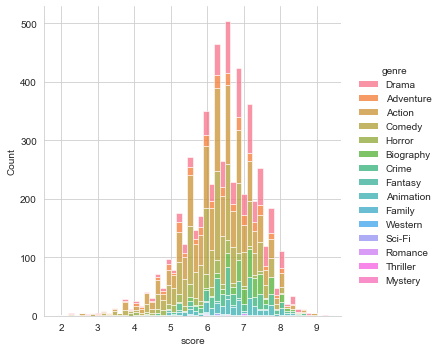

In [21]:
sns.displot(data, x="score", hue="genre", multiple="stack")


Finally, we will see which features fromt the original dataset are correlated to one another. We will not be using the inlation adjusted figures as for this analysis it should not matter. We expect to see strong positive correlations between budget and gross, gross and score.

In [22]:
#find corr, pearson correlation

data_corr = data.drop(['grossadjusted', 'budgetadjusted'], axis=1)


data_corr.corr()


,year,score,votes,budget,gross,runtime,efficiency
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,-0.008327
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,-0.012515
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,-0.011096
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,-0.009937
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,-0.010735
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,-0.018810
efficiency,-0.008327,-0.012515,-0.011096,-0.009937,-0.010735,-0.018810,1.000000


In [25]:
#find corr, spearman
data_corr.corr(method = "spearman")

,year,score,votes,budget,gross,runtime,efficiency
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,-0.187212
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,-0.277173
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,-0.560666
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,-0.039305
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,-0.701233
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,-0.037011
efficiency,-0.187212,-0.277173,-0.560666,-0.039305,-0.701233,-0.037011,1.000000


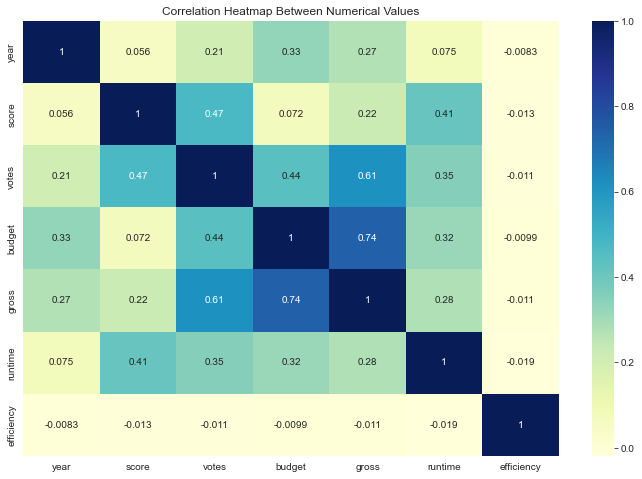

In [26]:
corr_matrix = data_corr.corr()

sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")

plt.title('Correlation Heatmap Between Numerical Values')

plt.show()

In [27]:
#unstacking

corr_pairs =corr_matrix.unstack()

corr_pairs.sort_values()

efficiency  runtime      -0.018810
runtime     efficiency   -0.018810
score       efficiency   -0.012515
efficiency  score        -0.012515
votes       efficiency   -0.011096
efficiency  votes        -0.011096
gross       efficiency   -0.010735
efficiency  gross        -0.010735
            budget       -0.009937
budget      efficiency   -0.009937
efficiency  year         -0.008327
year        efficiency   -0.008327
            score         0.056386
score       year          0.056386
budget      score         0.072001
score       budget        0.072001
year        runtime       0.075077
runtime     year          0.075077
votes       year          0.206021
year        votes         0.206021
gross       score         0.222556
score       gross         0.222556
year        gross         0.274321
gross       year          0.274321
runtime     gross         0.275796
gross       runtime       0.275796
budget      runtime       0.318695
runtime     budget        0.318695
budget      year    

In [28]:
sorted_corr_pairs = corr_pairs.sort_values()

sorted_corr_pairs

efficiency  runtime      -0.018810
runtime     efficiency   -0.018810
score       efficiency   -0.012515
efficiency  score        -0.012515
votes       efficiency   -0.011096
efficiency  votes        -0.011096
gross       efficiency   -0.010735
efficiency  gross        -0.010735
            budget       -0.009937
budget      efficiency   -0.009937
efficiency  year         -0.008327
year        efficiency   -0.008327
            score         0.056386
score       year          0.056386
budget      score         0.072001
score       budget        0.072001
year        runtime       0.075077
runtime     year          0.075077
votes       year          0.206021
year        votes         0.206021
gross       score         0.222556
score       gross         0.222556
year        gross         0.274321
gross       year          0.274321
runtime     gross         0.275796
gross       runtime       0.275796
budget      runtime       0.318695
runtime     budget        0.318695
budget      year    

In [29]:
#filter only the ones with high correlation, definedas greater than 0.6

high_corr_pairs = sorted_corr_pairs[(sorted_corr_pairs) > 0.6]

high_corr_pairs

gross       votes         0.614751
votes       gross         0.614751
gross       budget        0.740247
budget      gross         0.740247
year        year          1.000000
budget      budget        1.000000
gross       gross         1.000000
votes       votes         1.000000
score       score         1.000000
runtime     runtime       1.000000
efficiency  efficiency    1.000000
dtype: float64

One of our initial hypothesis was correct, we see moderate to strong relationships between gross and budget. We do not see a strong relationship between gross and score, in fact we only get a correlation coefficient of 0.22n which is a weak correlation. One surprising finding was the correlation between votes and gross with a coefficient of 0.61.

### Limitations and Opportunities for Further Analysis

We learned a lot from this dataset, but we must address some limitations. 

1. There are many metrics that can be used to measure the success of a movie. Efficiency is only one of them and accounting practices can also have a strong impact on profitability. Efficiency was picked merely for demonstrative purposes.
2. There are more opportunities to analyze this dataset! Further opportunities include finding the most popular actor between time periods, most popular movie genre, and most popular actors are among some of the options.

Further analysis will be conducted.